## Machine Learning - Session 4 -  Data Exploration and Data Manipulation

## Part 1 - Data Exploration

In [59]:
# Set the working directory
import os
#os.chdir("C:\\Users\\Gourab\\Desktop\\R")

#Read the cars.csv data
import pandas as pd
cars = pd.read_csv("cars.csv")

In [60]:
cars.head(5)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


#### 1. Summaries and Aggregates

In [61]:
#A. The describe() method

cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [62]:
cars[["MPG", "Weight"]].std()

MPG         8.401777
Weight    847.004328
dtype: float64

In [ ]:
#A. Aggregates - groupby() method


In [67]:
cars[["MPG","Weight","Origin"]].groupby(['Origin']).describe()

MPG                                                       Weight  \
        count       mean       std   min   25%    50%     75%   max  count   
Origin                                                                       
Europe   73.0  26.745205  8.626075   0.0  23.0  26.00  30.500  44.3   73.0   
Japan    79.0  30.450633  6.090048  18.0  25.7  31.60  34.050  46.6   79.0   
US      254.0  19.688189  6.928290   0.0  15.0  18.35  23.975  39.0  254.0   

                                                                           
               mean         std     min      25%     50%      75%     max  
Origin                                                                     
Europe  2431.493151  490.883617  1825.0  2065.00  2246.0  2800.00  3820.0  
Japan   2221.227848  320.497248  1613.0  1985.00  2155.0  2412.50  2930.0  
US      3372.700787  791.695866  1800.0  2721.25  3380.5  4054.75  5140.0

#### 2. Tables (Crosstabs)

In [70]:
#A. Univariate Frequency distribution of a categorical variable (say, Origin)

tab = pd.crosstab(cars.Origin, columns="Frequency")
tab

col_0,Frequency
Origin,
Europe,73
Japan,79
US,254


In [71]:
tab.sum()

col_0
Frequency    406
dtype: int64

In [73]:
#B. Univariate table of proportion
round(tab/(tab.sum())*100,2)

col_0,Frequency
Origin,
Europe,17.98
Japan,19.46
US,62.56


In [ ]:
#B. Univariate table of proportion


In [77]:
#C. Bi-variate Frequency Distribution Table
tab2 = pd.crosstab(cars.Origin, columns=cars.Cylinders)
tab2

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0,66,3,4,0
Japan,4,69,0,6,0
US,0,72,0,74,108


In [79]:
round((tab2/tab2.sum())*100,2)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.0,31.88,100.0,4.76,0.0
Japan,100.0,33.33,0.0,7.14,0.0
US,0.0,34.78,0.0,88.10,100.0


In [ ]:
#Re-Naming the Rows and Columns


In [80]:
#Finding the col-sums
tab2_col = tab2.sum(axis=0)
tab2_col

Cylinders
3      4
4    207
5      3
6     84
8    108
dtype: int64

In [83]:
#Finding the row sums
tab2_row = tab2.sum(axis=1)
tab2_row

Origin
Europe     73
Japan      79
US        254
dtype: int64

In [84]:
len(cars)

406

In [85]:
#D. Table of joint proportion

round((tab2/len(cars))*100,2)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.00,16.26,0.74,0.99,0.0
Japan,0.99,17.00,0.00,1.48,0.0
US,0.00,17.73,0.00,18.23,26.6


In [86]:
#OR
tab2/sum(tab2_col)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.000000,0.162562,0.007389,0.009852,0.00000
Japan,0.009852,0.169951,0.000000,0.014778,0.00000
US,0.000000,0.177340,0.000000,0.182266,0.26601


In [87]:
#E. Table of conditional proportion (Conditioned on rows)

tab2.div(tab2_row,axis=0)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.000000,0.904110,0.041096,0.054795,0.000000
Japan,0.050633,0.873418,0.000000,0.075949,0.000000
US,0.000000,0.283465,0.000000,0.291339,0.425197


In [88]:
#F. Table of conditional proportion (conditioned on columns)
tab2.div(tab2_col,axis=1)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.0,0.318841,1.0,0.047619,0.0
Japan,1.0,0.333333,0.0,0.071429,0.0
US,0.0,0.347826,0.0,0.880952,1.0


#### 3. Graphs

In [2]:
import matplotlib.pyplot as plt

#### 3A. Histograms

In [11]:
cars.head(5)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


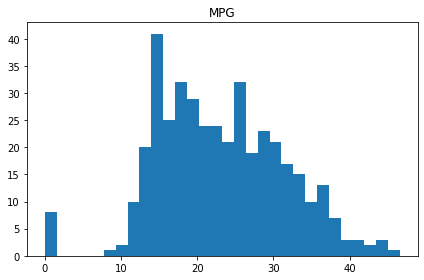

In [16]:
#histogram of MPG
cars.hist(column='MPG',grid=False, bins=30)
plt.tight_layout()


In [ ]:
#Additional arguments: 


*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html*

In [ ]:
#Labelling the axes and giving the title


In [ ]:
#Editing color and edgecolor


In [ ]:
#Breaking up by the categories of a categorical variable


#### 3B. Boxplots

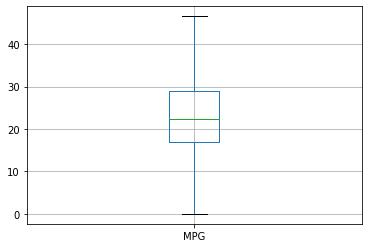

In [17]:
#Plotting a boxplot for the variable MPG

cars.boxplot(column='MPG')

In [ ]:
#Additional arguments (horizontal boxplot)


*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html*

In [ ]:
#Labelling the boxplot


In [ ]:
#Side by Side boxplot


In [ ]:
#The rotation argument
#Side by Side boxplot


#### 3C. Bar Plots

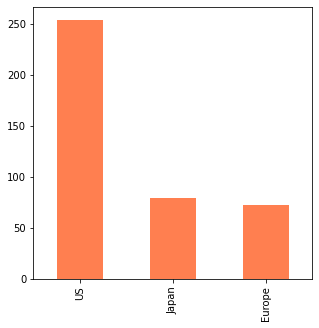

In [23]:
cars['Origin'].value_counts().plot(kind='bar',figsize=(5,5),color='coral')

In [26]:
#cars.plot(x='MPG', kind='hist')

Study pandas.DataFrame.plot: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html 

#### 3D. Scatter Plots

Text(0, 0.5, 'MPG of the cars')

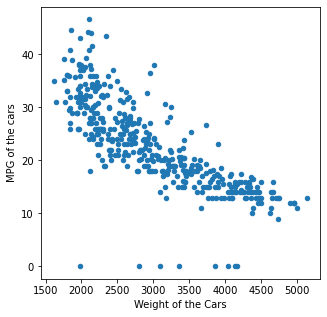

In [31]:
#Scatter plot 

cars.plot(kind='scatter', x='Weight',y='MPG', figsize=(5,5))

plt.xlabel("Weight of the Cars")
plt.ylabel("MPG of the cars")

# As the weight of  the cars increases, the MPG of the cars decreases roughly

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html*

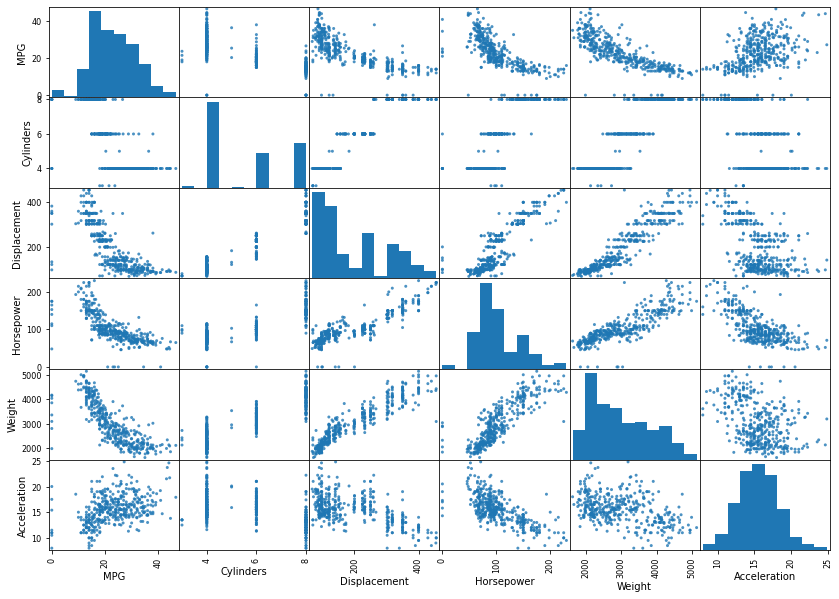

In [46]:
#Pairwise Scatterplot

from pandas.plotting import scatter_matrix
scatter_matrix(cars.drop(['Car', "Model", "Origin"], axis = 1),alpha=0.8,figsize=(14,10), diagonal = 'hist')
plt.show()

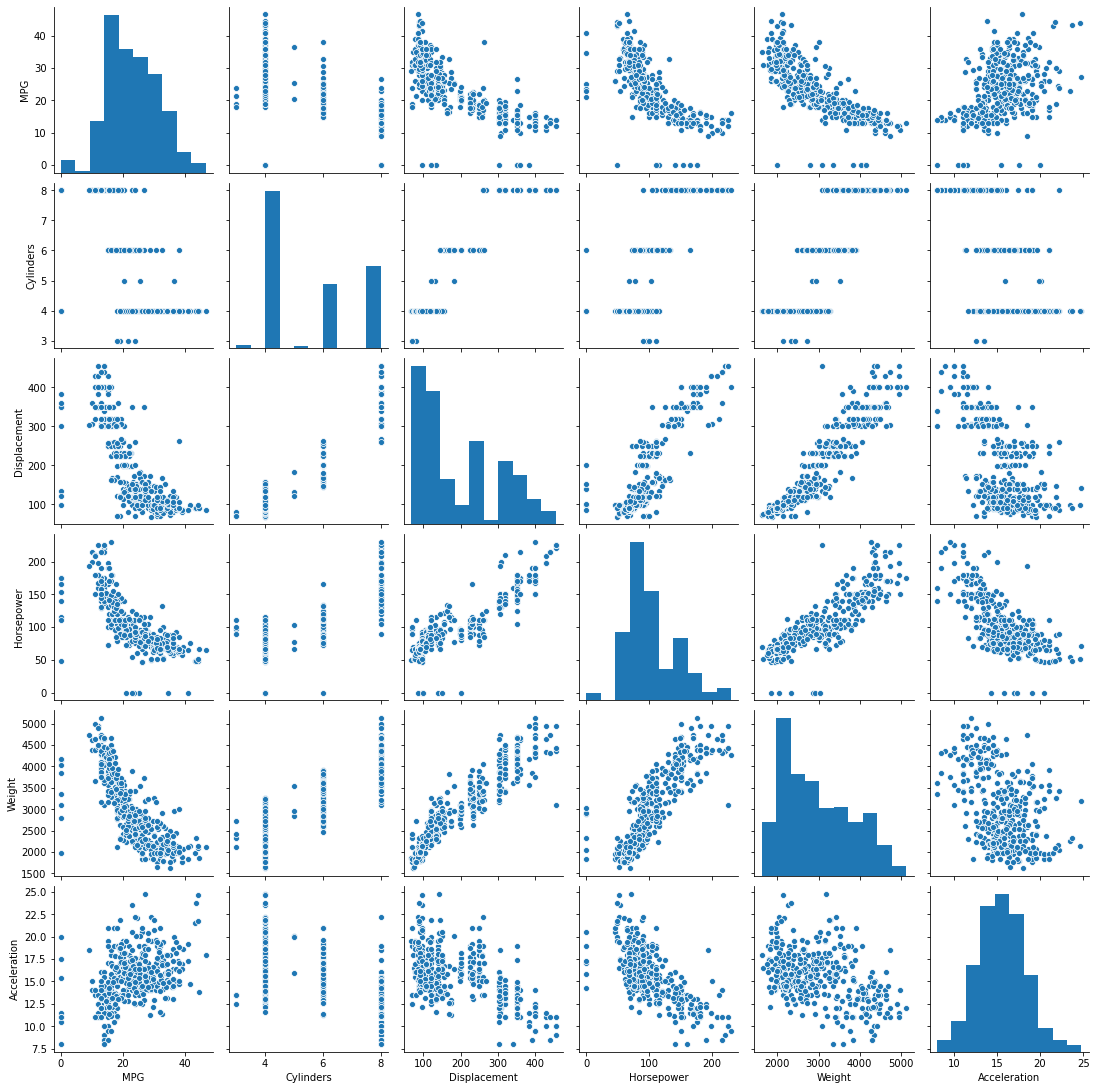

In [44]:
import seaborn as sns

sns.pairplot(data = cars.drop(['Car', "Model", "Origin"], axis = 1))


## Part 2 - Data Manipulation

#### 1. Sorting

In [47]:
cars.head(5)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [50]:
#Sort the data in ascending order of MPG
cars.sort_values('MPG').head(10)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
367,Saab 900s,0.0,4,121.0,110,2800,15.4,81,Europe
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
39,Volkswagen Super Beetle 117,0.0,4,97.0,48,1978,20.0,71,Europe
10,Citroen DS-21 Pallas,0.0,4,133.0,115,3090,17.5,70,Europe
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165,4142,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153,4034,11.0,70,US
14,AMC Rebel SST (sw),0.0,8,360.0,175,3850,11.0,70,US
34,Hi 1200D,9.0,8,304.0,193,4732,18.5,70,US
31,Ford F250,10.0,8,360.0,215,4615,14.0,70,US


In [51]:
#Sort the data in descending order of MPG
cars.sort_values('MPG', ascending=0).head(10)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
329,Mazda GLC,46.6,4,86.0,65,2110,17.9,80,Japan
336,Honda Civic 1500 gl,44.6,4,91.0,67,1850,13.8,80,Japan
332,Volkswagen Rabbit C (Diesel),44.3,4,90.0,48,2085,21.7,80,Europe
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
333,Volkswagen Dasher (diesel),43.4,4,90.0,48,2335,23.7,80,Europe
251,Volkswagen Rabbit Custom Diesel,43.1,4,90.0,48,1985,21.5,78,Europe
316,Volkswagen Rabbit,41.5,4,98.0,76,2144,14.7,80,Europe
337,Renault Lecar Deluxe,40.9,4,85.0,0,1835,17.3,80,Europe
331,Datsun 210,40.8,4,85.0,65,2110,19.2,80,Japan
254,Datsun B210 GX,39.4,4,85.0,70,2070,18.6,78,Japan


In [55]:
#Sort the data in descending order of Origin and then by increasing order of MPG

cars.sort_values(['Origin','MPG'], ascending=[0,1]).head(10)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165,4142,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153,4034,11.0,70,US
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
14,AMC Rebel SST (sw),0.0,8,360.0,175,3850,11.0,70,US
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
34,Hi 1200D,9.0,8,304.0,193,4732,18.5,70,US
31,Ford F250,10.0,8,360.0,215,4615,14.0,70,US
32,Chevy C20,10.0,8,307.0,200,4376,15.0,70,US
33,Dodge D200,11.0,8,318.0,210,4382,13.5,70,US
74,Mercury Marquis,11.0,8,429.0,208,4633,11.0,72,US


In [58]:
#Saving in another data frame

cars2 = cars.sort_values(['Origin','MPG'], ascending=[0,1])

cars2


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165,4142,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153,4034,11.0,70,US
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
14,AMC Rebel SST (sw),0.0,8,360.0,175,3850,11.0,70,US
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
...,...,...,...,...,...,...,...,...,...
316,Volkswagen Rabbit,41.5,4,98.0,76,2144,14.7,80,Europe
251,Volkswagen Rabbit Custom Diesel,43.1,4,90.0,48,1985,21.5,78,Europe
333,Volkswagen Dasher (diesel),43.4,4,90.0,48,2335,23.7,80,Europe
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe


In [ ]:
#Exporting Data

#### 2. Variable Transformation

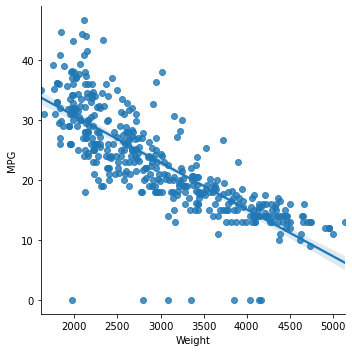

In [57]:
# Plot a scatter plot between MPG and weight. Comment of the linearity.

sns.lmplot(x='Weight',y='MPG',data=cars)

In [ ]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve?


In [ ]:
# But there is a problem! Check the summary of log(MPG). What do you observe?


In [ ]:
# Can you identify where we got misleaded? Probably the answer lies in the summary of MPG.
# How can we correct this?


In [ ]:
# Study the association between MPG and Horsepower. (Do Yourself)



#### The np.where() function


In [ ]:
import numpy as np

In [ ]:
# PROBLEM 1:
# Create a variable HP which will take only two values:
# IF Horsepower < 100 THEN "Low HP"
# IF Horsepower >= 100 THEN "High HP"




In [ ]:
#PROBLEM 2:
# Create a Variable MPG_Rate which will take on the values as follows:
# IF MPG < 15 THEN "Normal"
# IF MPG >= 15 AND MPG <=25 THEN "GOOD"
# IF MPG >= 25 AND MPG <=35 THEN "GREAT"
# IF MPG >= 35 THEN "AWESOME"


